# Demonstration: Adjusted $R^2$ and the Fischer Test

First we have our standard header with common import statements, and a statement to make plots look nice.

In [1]:
# standard import statements
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as opt

import classlib4334

# jupyter-specific display instructions
mpl.rcParams['font.size'] = 11
mpl.rcParams['lines.linewidth'] = 2
%config InlineBackend.figure_format = 'retina'

The demonstration is all about polynomial models, so let's define a bunch of them.

In [2]:
def p1(x, a, b):
    return a + b*x

def p2(x, a, b, c):
    return a + b*x + c*x**2

def p3(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

def p4(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

def p5(x, a, b, c, d, e, f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

def p6(x, a, b, c, d, e, f, g):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6

def p7(x, a, b, c, d, e, f, g, h):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7

## Example 2

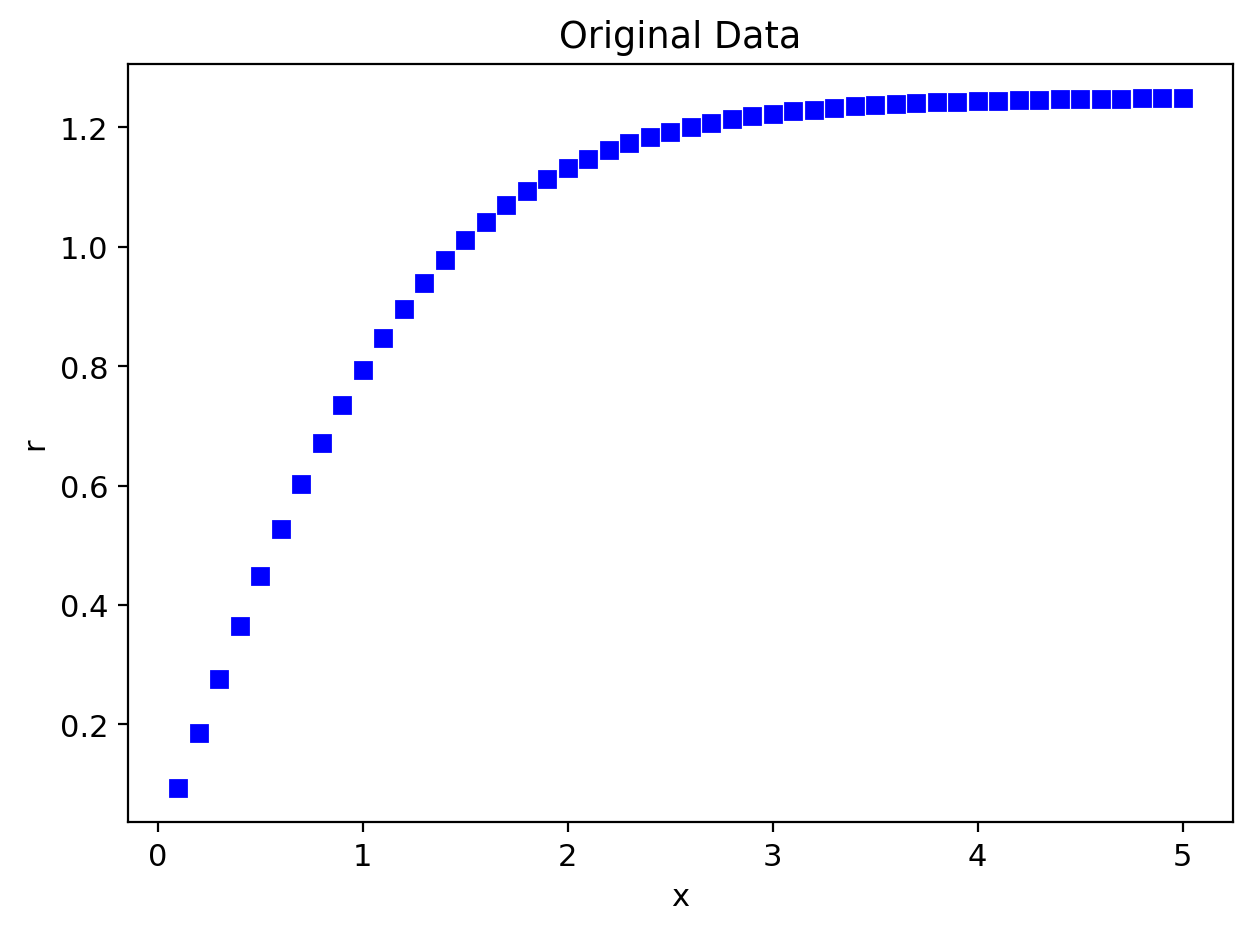

In [3]:
excel_file = 'data/demo-polynomial-3.xlsx'
mydata = pd.read_excel(excel_file)
x = np.array(mydata['x'])
y = np.array(mydata['y'])

N = len(x)
rms = np.sqrt(np.mean(y**2))
ymean = np.mean(y)

plt.figure()
plt.plot(x, y, 'bs')
plt.xlabel('x')
plt.ylabel('r')
plt.title('Original Data')
plt.tight_layout()
plt.show()

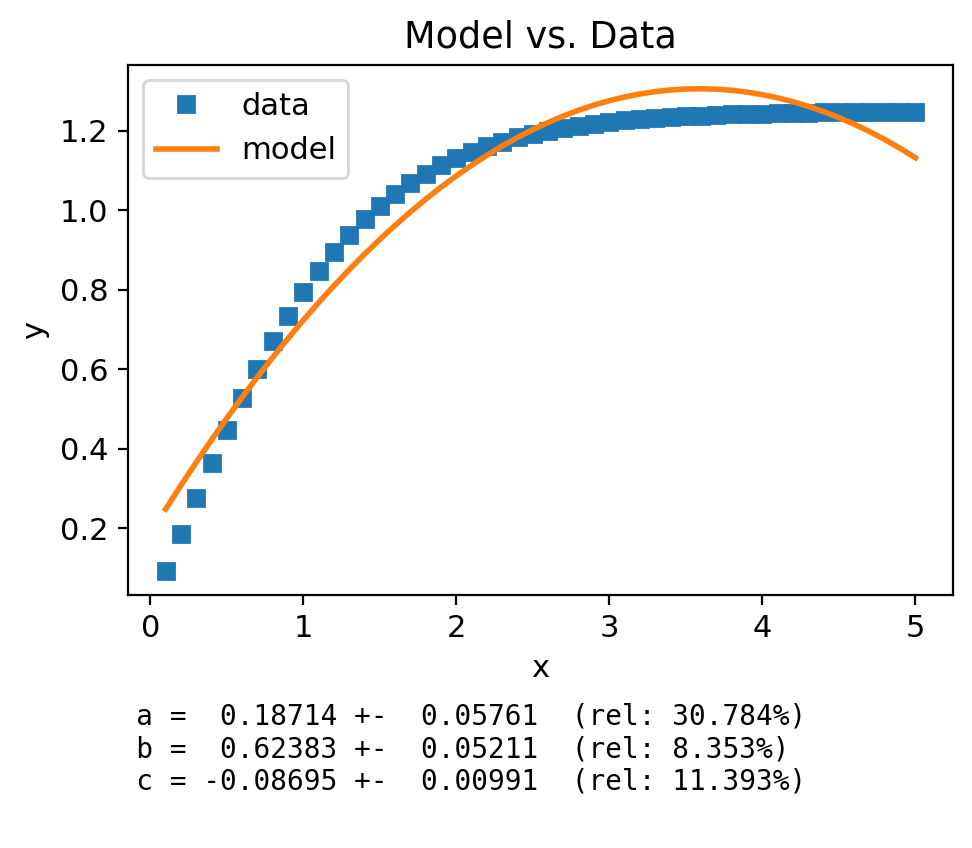

In [4]:
fit2, err2 = classlib4334.fit_and_plot(p2, x, y)

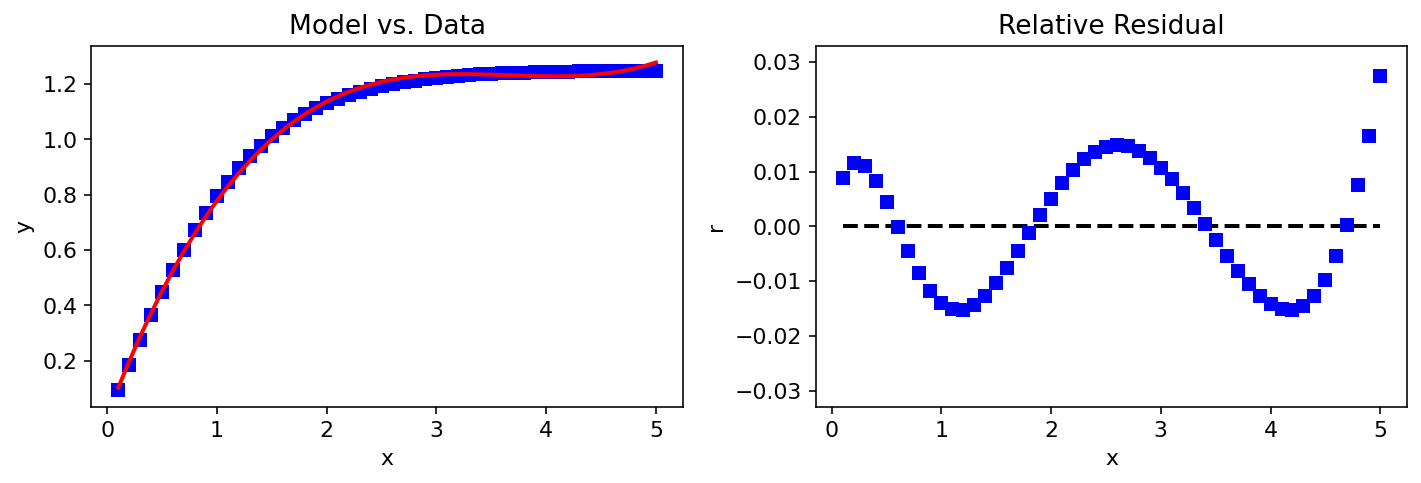

Parameter Values: 95%

   a =   0.002019 +- 0.015344
   b =   1.038999 +- 0.025798
   c =  -0.288459 +- 0.011692
   d =   0.026341 +- 0.001508

absolute r-squared: 0.99851892  (2.83 nines)
adjusted r-squared: 0.99842232  (2.80 nines)




In [26]:
fit3, err3 = classlib4334.fit_and_plot(p3, x, y)

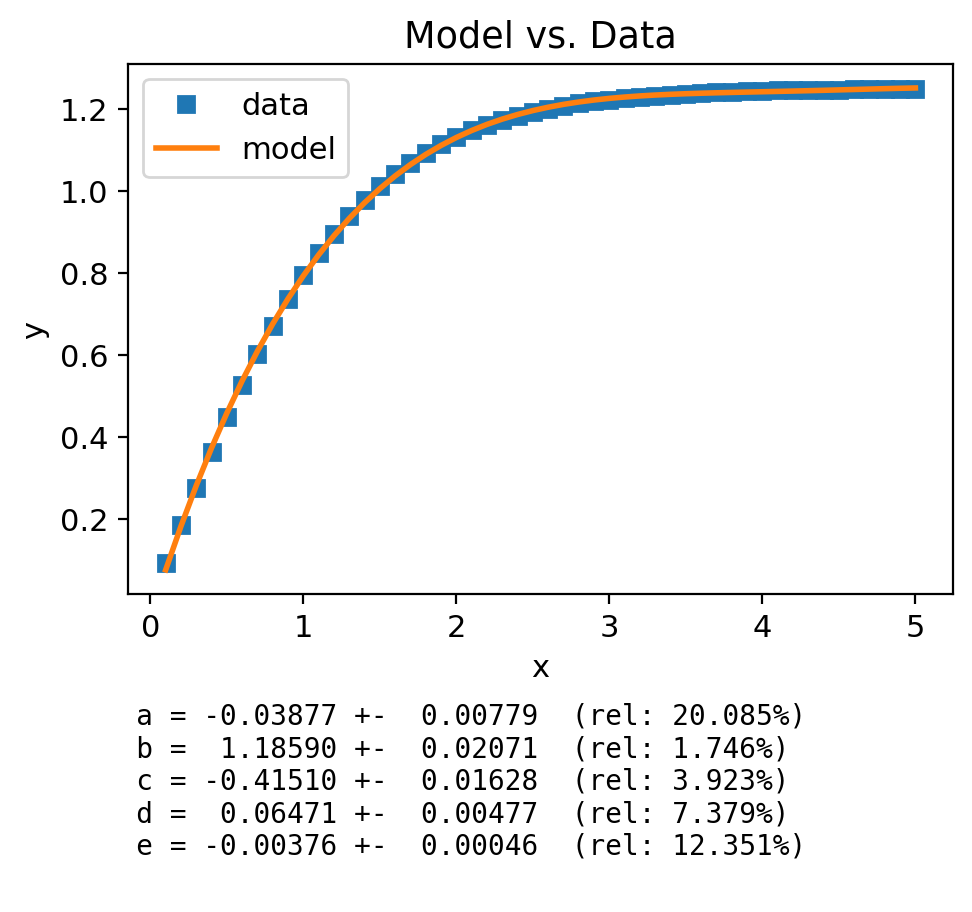

In [5]:
fit4, err4 = classlib4334.fit_and_plot(p4, x, y)

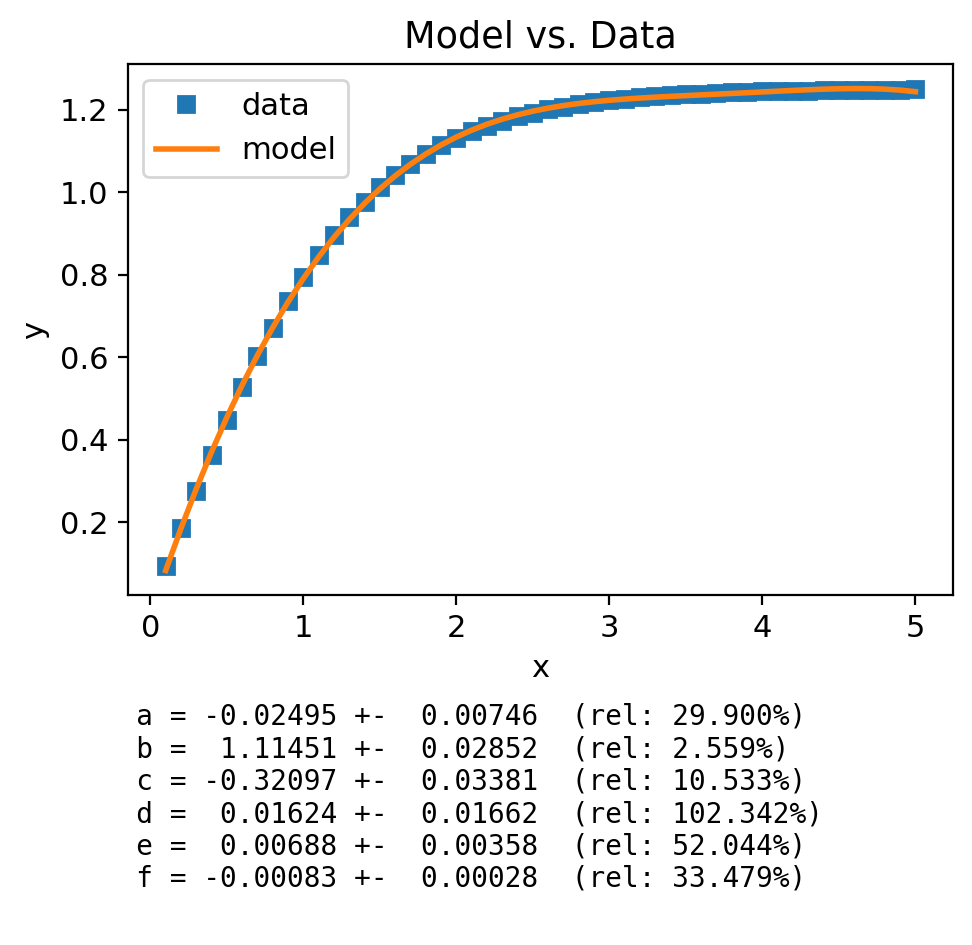

In [24]:
fit5, err5 = classlib4334.fit_and_plot(p5, x, y)

In [25]:
# Compare nested conducts our Fisher Test
# Fisher test is used when adding or subtracting a term from a model,
## and keep going until based on Fisher Test, we cannot improve
fnum, pval = classlib4334.compare_nested(x, y, p5, p6)

F-test comparing p5 (simple) vs. p6 (complex)

  Simple:   SS=0.000587, DOF=  44
  Complex:  SS=0.000074, DOF=  43
  F-number: 298.3666 
  P-value:  0.0000 
  Random?   0.000%

It is recommended to prefer the complex function.



Text(0.5, 1.0, 'Model vs. Data')

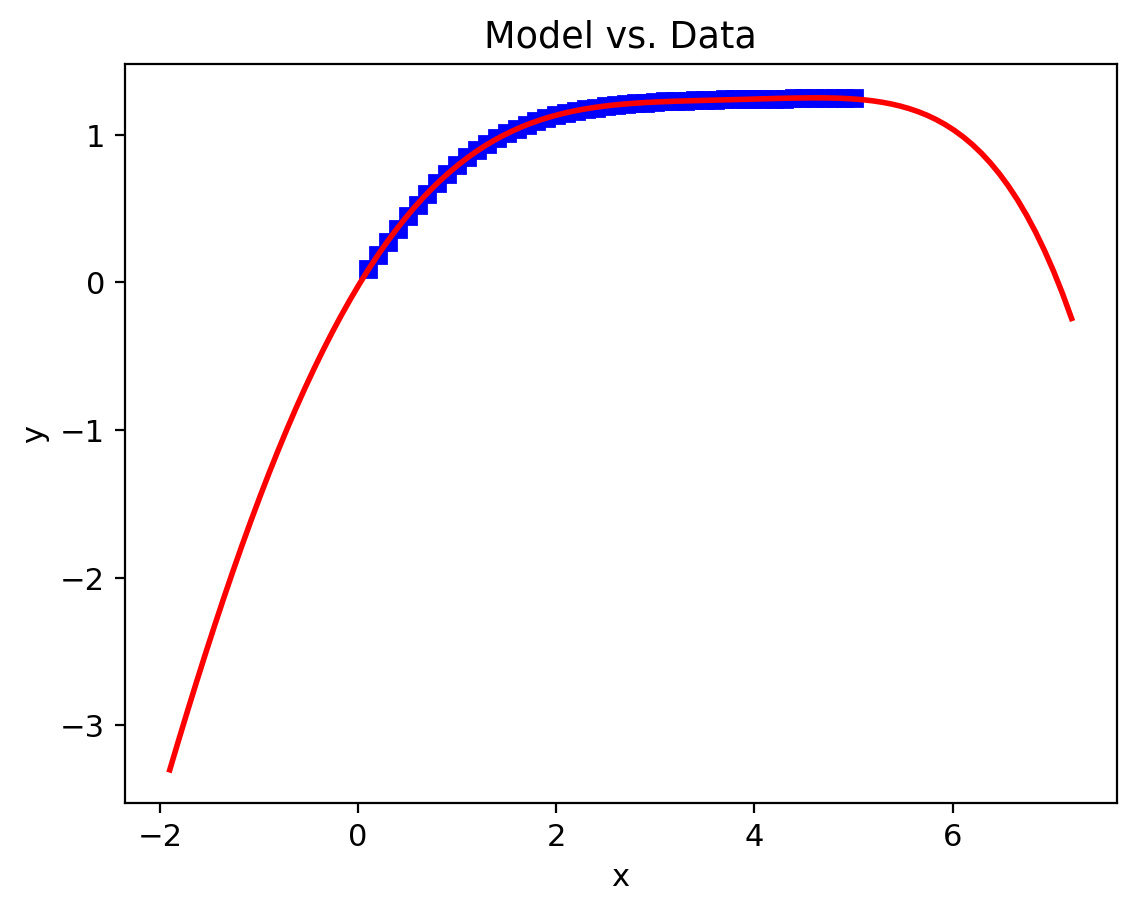

In [7]:
xext = np.linspace(min(x)-2, max(x)+2.2, 101)
pext = p5(xext, *fit5)

plt.figure()
plt.plot(x, y, 'bs')
plt.plot(xext, pext, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')


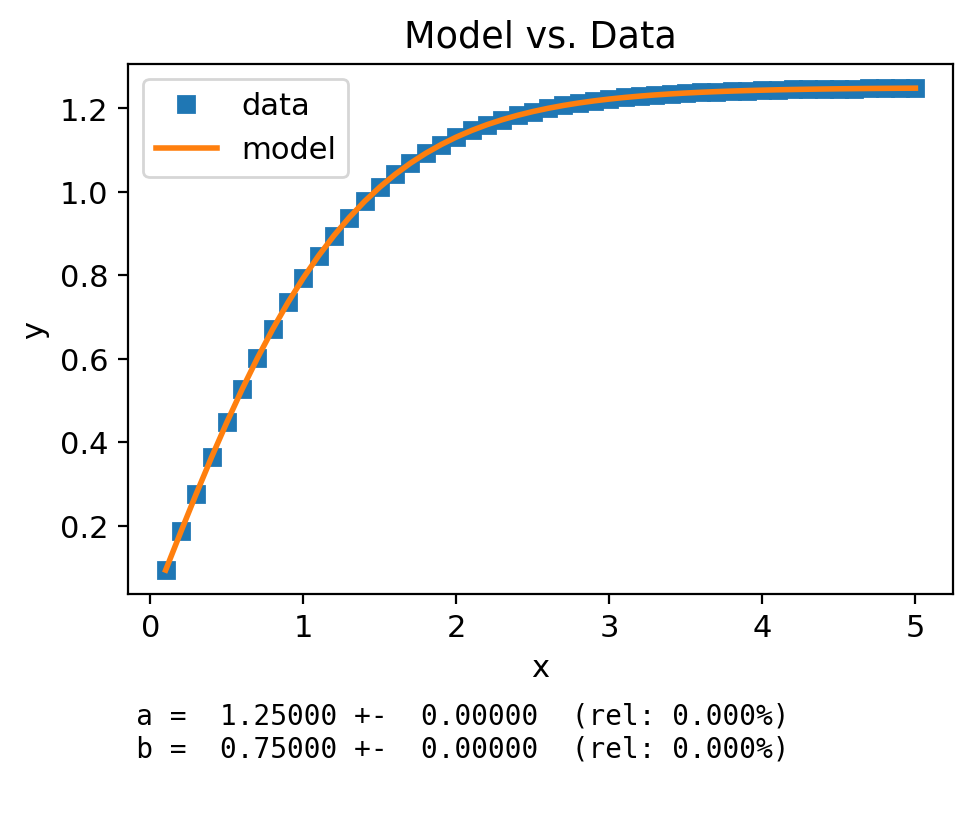

In [8]:
def newmodel(x, a, b):
    return a*np.tanh(b*x)

fitn, errn = classlib4334.fit_and_plot(newmodel, x, y)

In [9]:
data_file = 'data/demo-polynomial-3a.xlsx'
data = pd.read_excel(data_file)
x = data['x']
ny = data['ny']

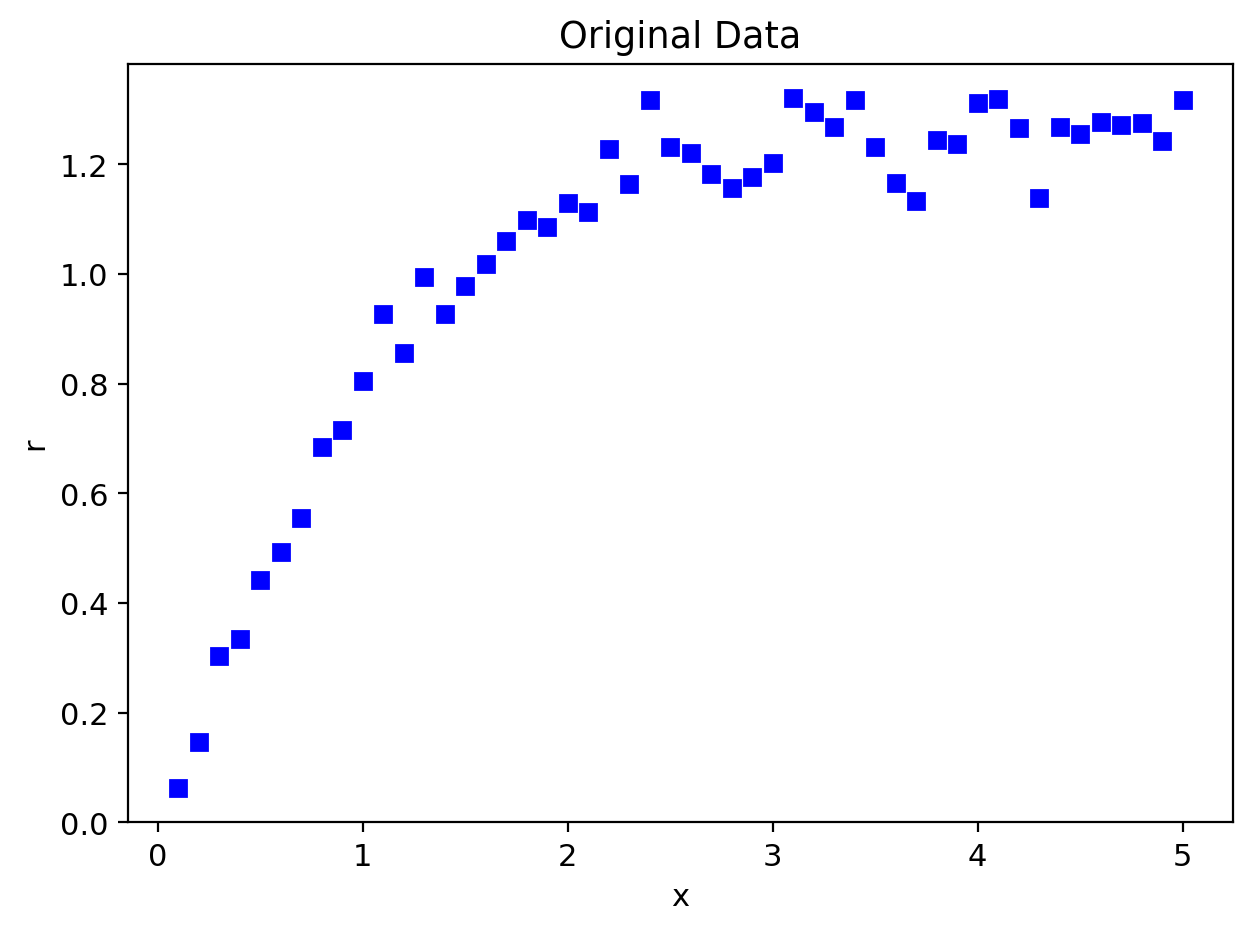

In [10]:
plt.figure()
plt.plot(x, ny, 'bs')
plt.xlabel('x')
plt.ylabel('r')
plt.title('Original Data')
plt.tight_layout()
plt.show()

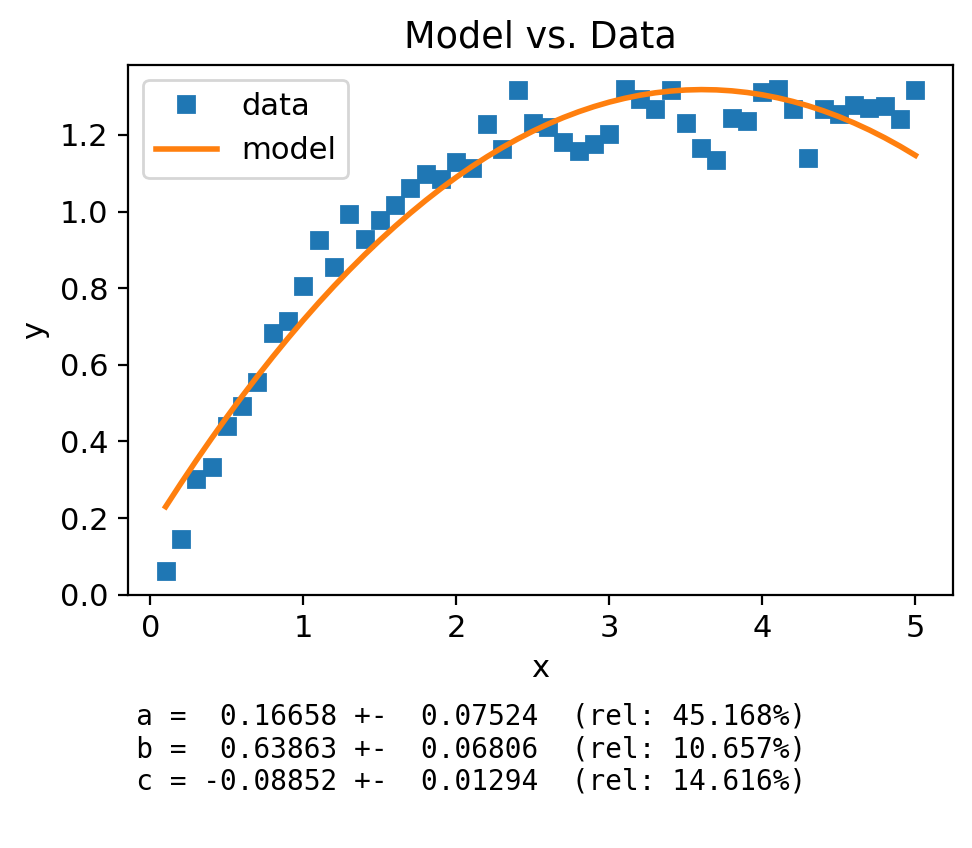

In [11]:
fit2, err2 = classlib4334.fit_and_plot(p2, x, ny)

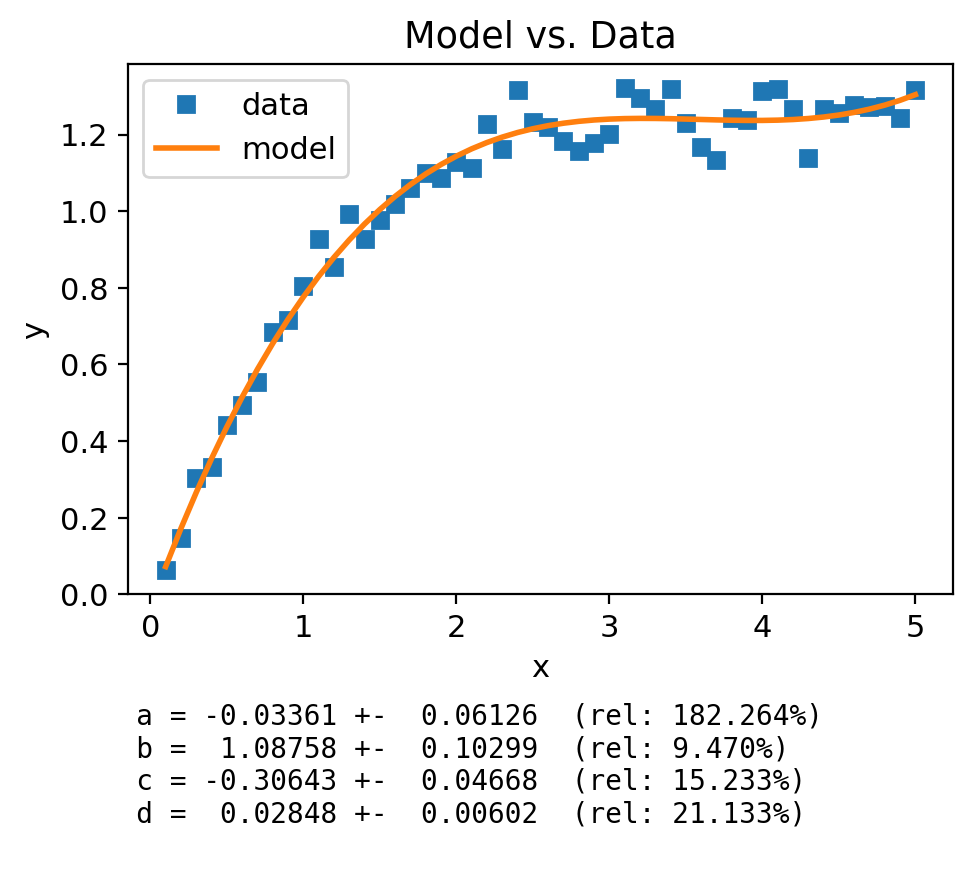

In [12]:
fit3, err3 = classlib4334.fit_and_plot(p3, x, ny)

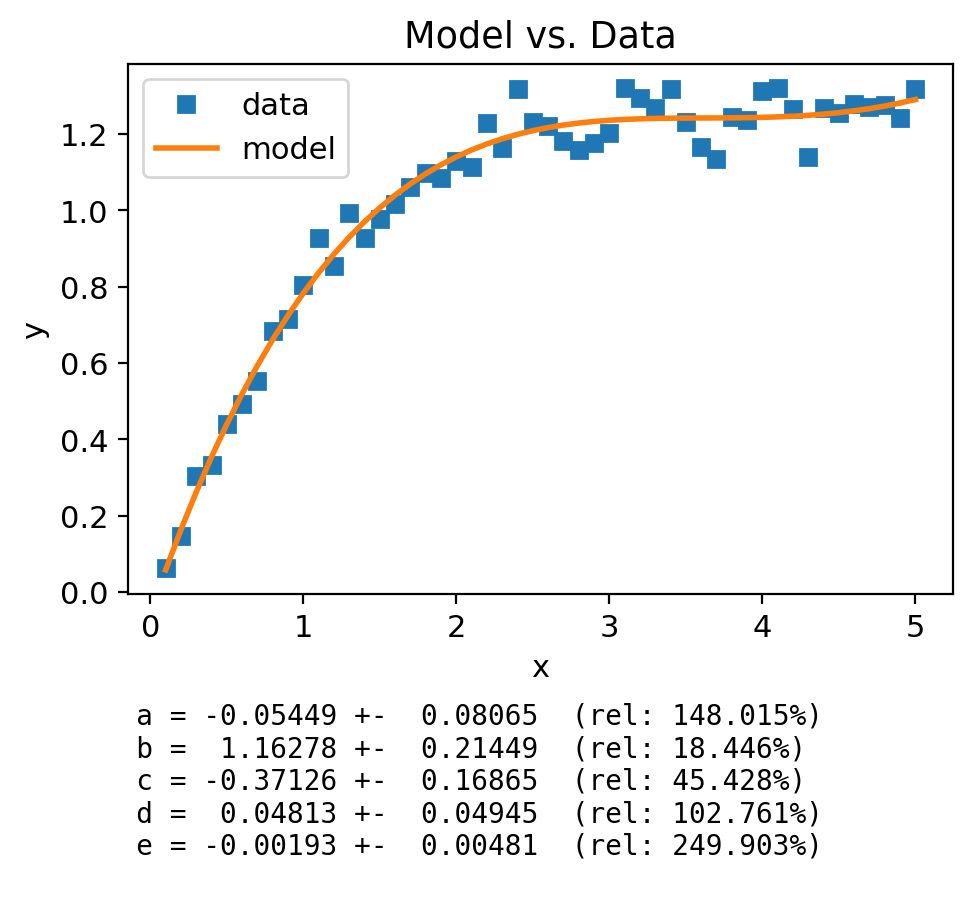

In [13]:
fit4, err4 = classlib4334.fit_and_plot(p4, x, ny)

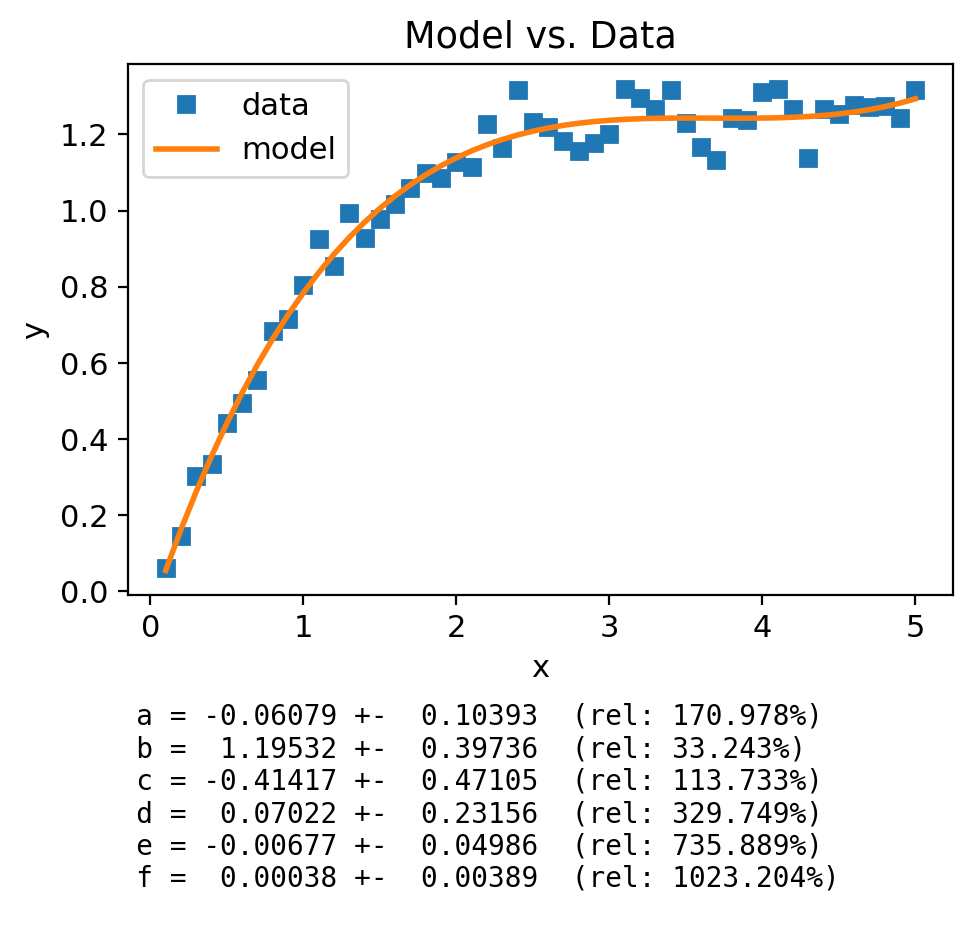

In [14]:
fit5, err5 = classlib4334.fit_and_plot(p5, x, ny)

In [15]:
fnum34, pval34 = classlib4334.compare_nested(x, ny, p3, p4)

F-test comparing p3 (simple) vs. p4 (complex)

  Simple:   SS=0.115622, DOF=  46
  Complex:  SS=0.114000, DOF=  45
  F-number: 0.6405 
  P-value:  0.4277 
  Random?   42.774%

It is recommended to prefer the simple function.



Text(0.5, 1.0, 'Model vs. Data')

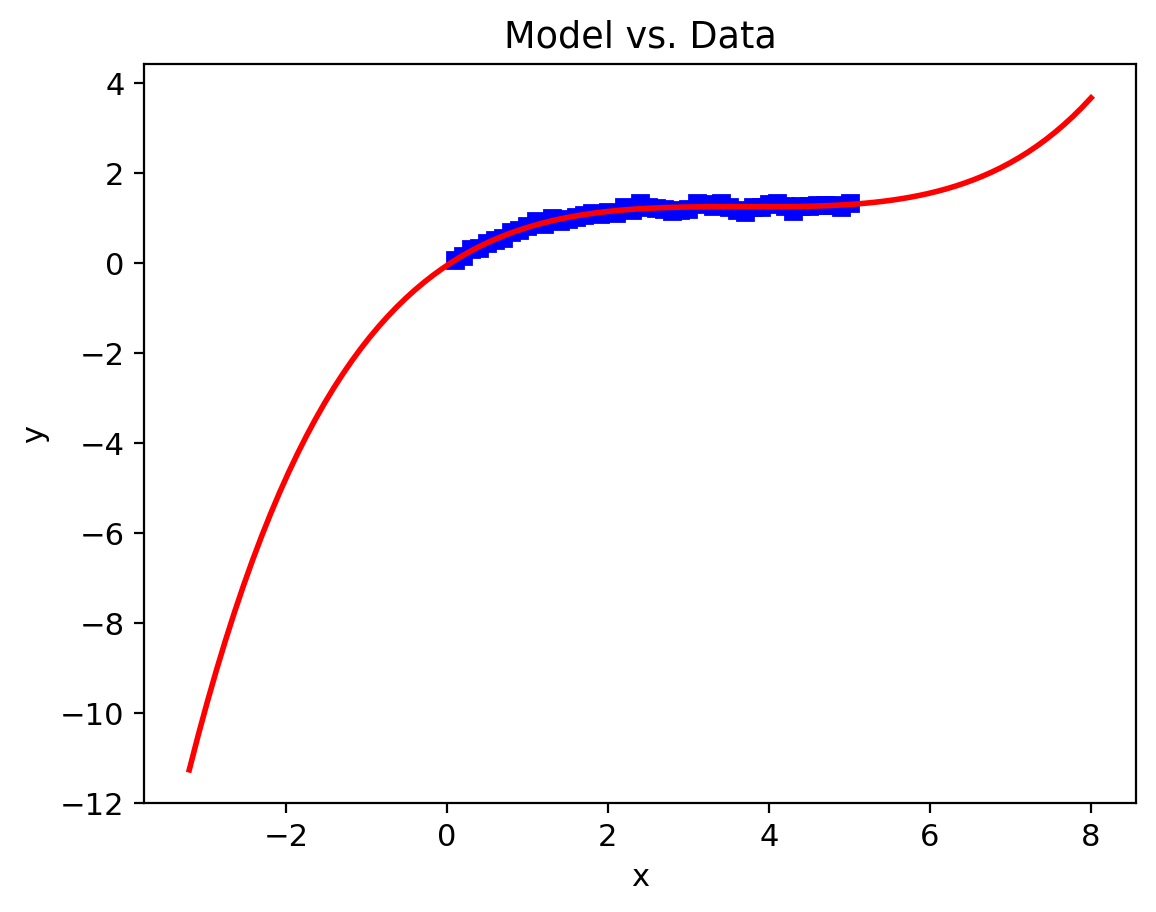

In [16]:
xext = np.linspace(min(x)-3.3, max(x)+3, 101)
pext = p5(xext, *fit5)

plt.figure()
plt.plot(x, ny, 'bs')
plt.plot(xext, pext, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')

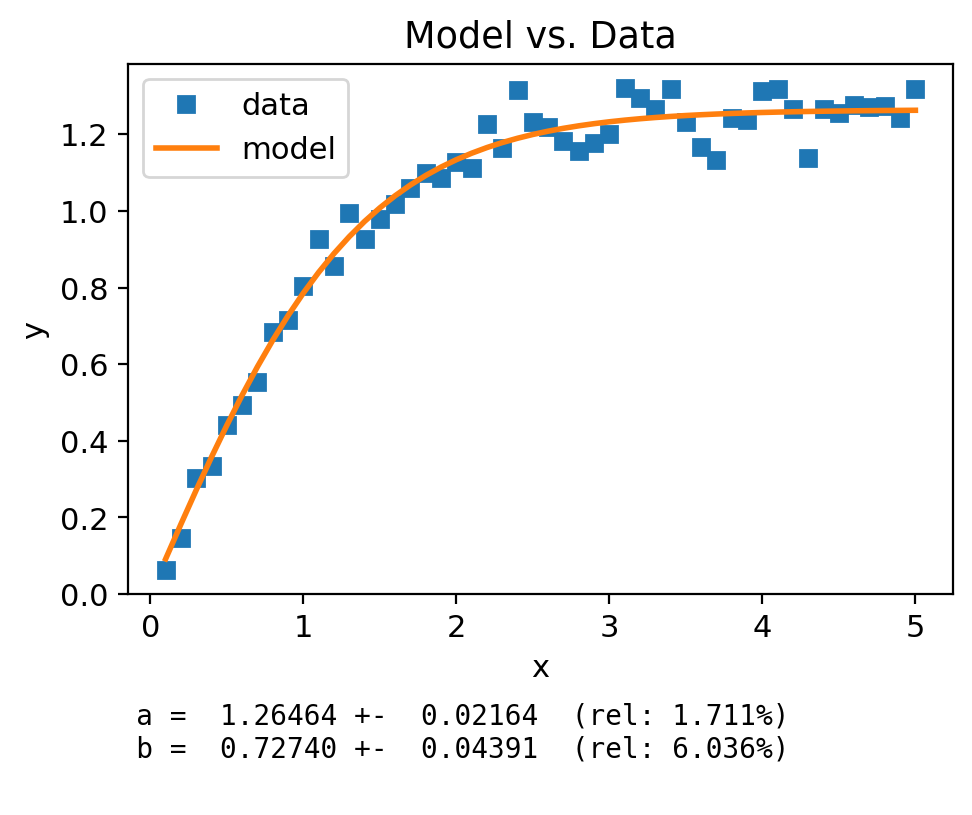

In [17]:
fit, err = classlib4334.fit_and_plot(newmodel, x, ny)